**01) Importe as bibliotecas pandas e matplotlib, usando a palavra mágica inline para exibir as visualizações no notebook; e carregue os dados, que estão disponibilizados neste link:dados, em um DataFrame. Assim, você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente.**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
games = pd.read_csv('games.txt')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**02) Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo.**

**I) Fiz um novo dataframe filtrando somente: Publisher = Nintendo**

In [3]:
games_filtrado1 = games[games['Publisher'] == 'Nintendo']
games_filtrado1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


**II) Agrupei por gênero**

In [4]:
generos = games_filtrado1.groupby(by='Genre').sum()
generos

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,359543,156516.0,63.49,29.02,29.24,6.48,128.18
Adventure,193705,70161.0,17.72,7.66,9.01,1.28,35.71
Fighting,47056,36031.0,27.10,8.64,14.94,2.65,53.35
Misc,523309,200625.0,61.98,51.62,55.25,11.78,180.67
Platform,245890,222146.0,220.14,85.21,102.36,19.47,427.21
Puzzle,327830,148134.0,55.74,26.42,37.09,5.53,124.88
Racing,82066,73967.0,73.55,39.75,29.22,8.81,151.30
Role-Playing,374106,210720.0,105.63,63.92,102.24,13.07,284.90
Shooter,98683,48030.0,51.39,9.85,6.07,2.39,69.73


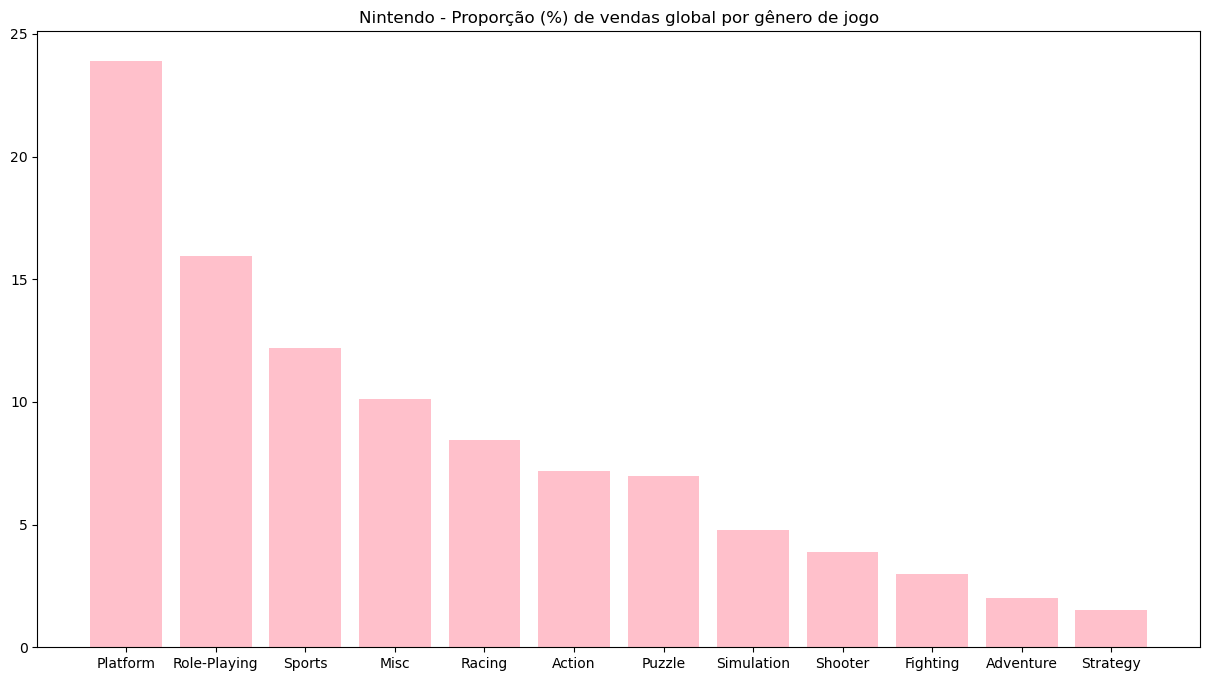

In [5]:
generos = generos.sort_values(by='Global_Sales',ascending=False)
porcentagens = generos['Global_Sales']*100.0/generos['Global_Sales'].sum()
plt.style.use('default')
plt.figure(figsize=(15,8))
plt.bar(generos.index,porcentagens, color='pink')
plt.title('Nintendo - Proporção (%) de vendas global por gênero de jogo')
plt.show()

**03) Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015.**

**I) Fiz um novo dataframe filtrando somente: Year >= ao ano de 2015**

In [6]:
games_filtrado2 = games[games['Year']>= 2015.0 ]
games_filtrado2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
...,...,...,...,...,...,...,...,...,...,...,...
16565,16568,Teslagrad,PSV,2015.0,Platform,Rain Games,0.00,0.01,0.00,0.00,0.01
16569,16572,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16570,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


**II) Agrupei por plataforma**

In [7]:
plataforma = games_filtrado2.groupby(by='Platform').count()
plataforma

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,,
3DS,121,121,121,121,121,121,121,121,121,121
DS,1,1,1,1,1,1,1,1,1,1
PC,88,88,88,88,88,88,88,88,88,88
PS3,106,106,106,106,106,106,106,106,106,106
PS4,245,245,245,245,245,245,245,245,245,245
PSP,3,3,3,3,3,3,3,3,3,3
PSV,175,175,175,175,173,175,175,175,175,175
Wii,4,4,4,4,4,4,4,4,4,4
WiiU,38,38,38,38,38,38,38,38,38,38


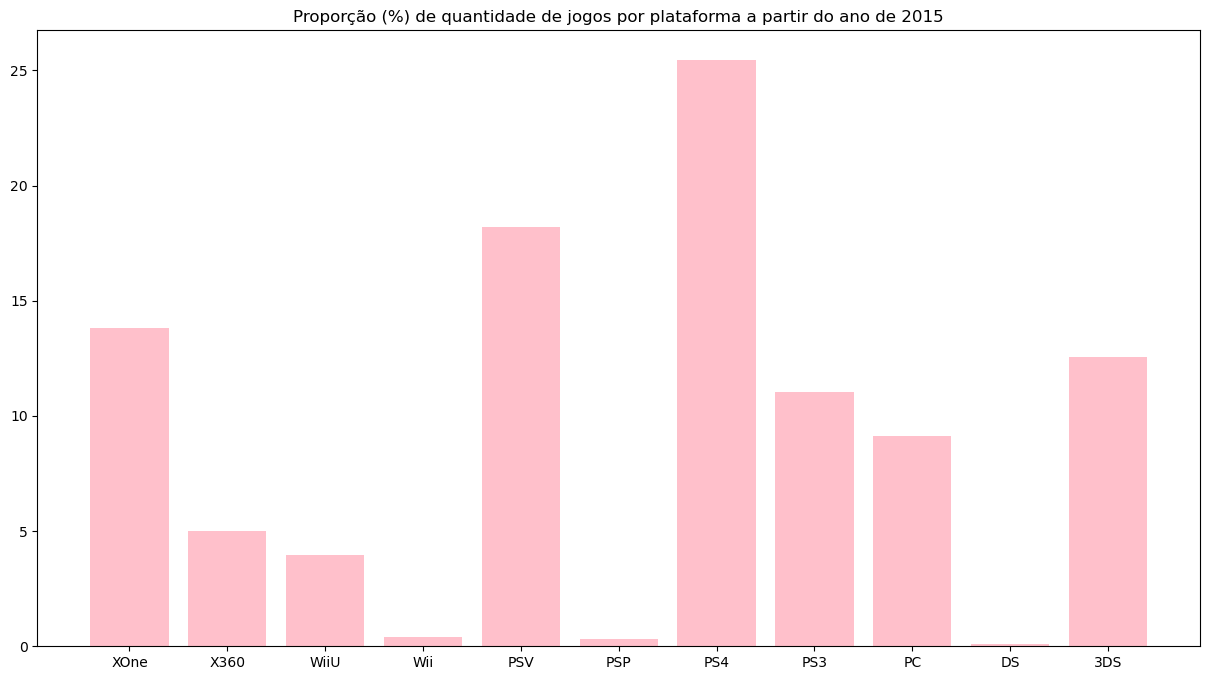

In [8]:
plataforma = plataforma.sort_values(by='Platform',ascending=False)
porcentagens = plataforma['Rank']*100.0/plataforma['Rank'].sum()
plt.style.use('default')
plt.figure(figsize=(15,8))
plt.bar(plataforma.index,porcentagens, color='pink')
plt.title('Proporção (%) de quantidade de jogos por plataforma a partir do ano de 2015')
plt.show()